In [1]:

# - Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.
# - Contestad a las preguntas planteadas usando los principales estadísticos que hemos aprendido y gráficas que mejor se ajusten.


In [2]:
from scipy import stats 
import seaborn as sns
import numpy as np 
import pandas as pd
from statistics import median
import matplotlib.pyplot as plt
df= pd.read_csv('./datos/India_Menu.csv')


In [12]:
df.head()

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
0,Regular Menu,McVeggie™ Burger,168 g,402.05,10.24,13.83,5.34,0.16,2.49,56.54,7.90,4.49,706.13
1,Regular Menu,McAloo Tikki Burger®,146 g,339.52,8.50,11.31,4.27,0.20,1.47,50.27,7.05,4.07,545.34
2,Regular Menu,McSpicy™ Paneer Burger,199 g,652.76,20.29,39.45,17.12,0.18,21.85,52.33,8.35,5.27,1074.58
3,Regular Menu,Spicy Paneer Wrap,250 g,674.68,20.96,39.10,19.73,0.26,40.93,59.27,3.50,1.08,1087.46
4,Regular Menu,American Veg Burger,177 g,512.17,15.30,23.45,10.51,0.17,25.24,56.96,7.85,4.76,1051.24


In [3]:
# - Hacer una exploración inicial del dataframe.
#¿Cuántas filas tiene?
df.shape[0]

141

In [4]:
#¿Cuántas nulos tiene?
df.isnull().sum()

Menu Category             0
Menu Items                0
Per Serve Size            0
Energy (kCal)             0
Protein (g)               0
Total fat (g)             0
Sat Fat (g)               0
Trans fat (g)             0
Cholesterols (mg)         0
Total carbohydrate (g)    0
Total Sugars (g)          0
Added Sugars (g)          0
Sodium (mg)               1
dtype: int64

In [5]:
#¿Y duplicados?

df.duplicated().sum()

0

In [6]:
#¿Qué tipo de datos tenemos en el dataframe?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141 entries, 0 to 140
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Menu Category           141 non-null    object 
 1   Menu Items              141 non-null    object 
 2   Per Serve Size          141 non-null    object 
 3   Energy (kCal)           141 non-null    float64
 4   Protein (g)             141 non-null    float64
 5   Total fat (g)           141 non-null    float64
 6   Sat Fat (g)             141 non-null    float64
 7   Trans fat (g)           141 non-null    float64
 8   Cholesterols (mg)       141 non-null    float64
 9   Total carbohydrate (g)  141 non-null    float64
 10  Total Sugars (g)        141 non-null    float64
 11  Added Sugars (g)        141 non-null    float64
 12  Sodium (mg)             140 non-null    float64
dtypes: float64(10), object(3)
memory usage: 14.4+ KB


In [7]:
df.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [8]:
#  Plantead una serie de preguntas como las que fuimos contestando en la clase invertida.
#¿CUAL ES EL PRODUCTO CON MÁS GRASAS?¿Y EL QUE MENOS? (TOTAL FAT (g))

menu_fat = df.groupby('Menu Category')["Total fat (g)"].max()

menu_fat

#con este groupby podemos observar dentro de las categorías del menú, cuales son los valores más altos, lo que nos permite
#representar con mayor facilidad, que el menú gourmet tiene el valor más alto mientras que el menú de bebidas el más bajo.



Menu Category
Beverages Menu      1.75
Breakfast Menu     15.94
Condiments Menu    23.45
Desserts Menu       6.81
Gourmet Menu       45.18
McCafe Menu        18.89
Regular Menu       39.45
Name: Total fat (g), dtype: float64

In [9]:
menu_sugar = df.groupby('Menu Category')['Total Sugars (g)'].max()

menu_sugar 


#decidimos también representar el máximo de azucar que puede contener cada menú para comparar con el resultado anterior, lo que podemos ver es que los 
#resultados se disparan, podemos observar que todos los menús tienen altos índices de azucar pero el menú de bebidas es el más alto.
#Podemos concluír que el menú de bebidas a pesar de que es el que tiene menos grasa, hay que considerar otros factores para determinar qué tan "malo" es 
#por ejemplo con la tabla de azucar pudimos comprobar que es el más alto, lo cual es batante lógico ya que las bebidas rara vez contienen grasa pero sí
# mucha azucar.

Menu Category
Beverages Menu     64.22
Breakfast Menu     25.72
Condiments Menu    16.83
Desserts Menu      25.35
Gourmet Menu       16.75
McCafe Menu        55.14
Regular Menu       29.60
Name: Total Sugars (g), dtype: float64

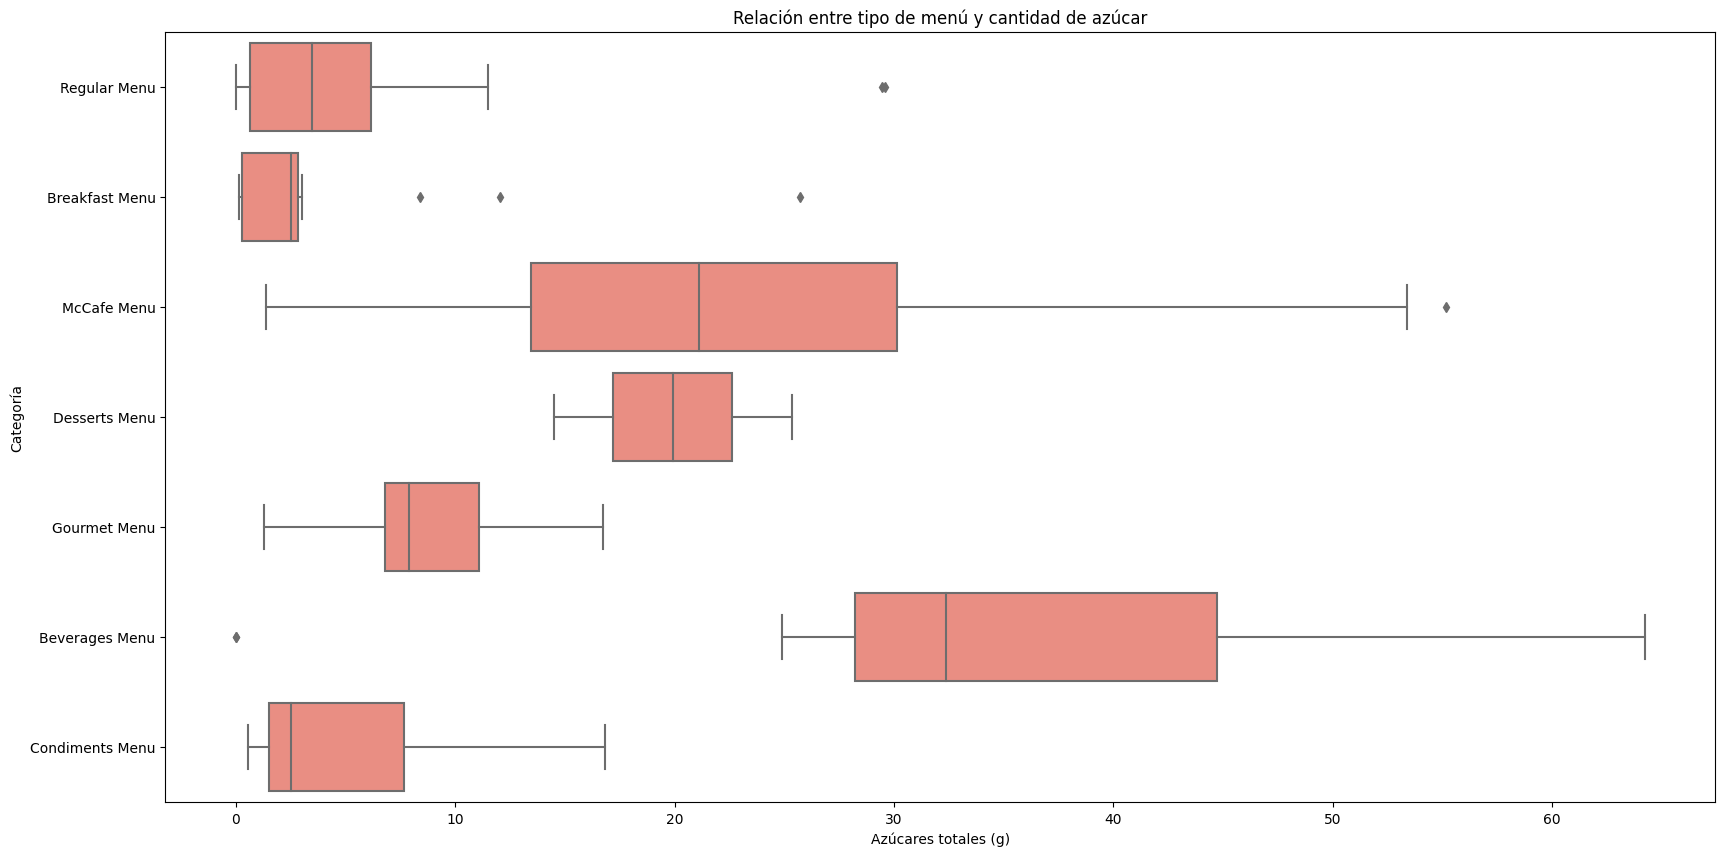

In [10]:
plt.figure(figsize =(20,10))
fig = sns.boxplot(x=df['Total Sugars (g)'], y= df['Menu Category'], color=  "salmon")
fig.set(xlabel='Azúcares totales (g)', ylabel= 'Categoría' )
fig.set_title('Relación entre tipo de menú y cantidad de azúcar')
plt.show()

In [11]:
#Esta gráfica representa de forma muy visual la cantidad de azucar en gramos que contiene cada opción de menú, 
# podemos observar cómo el menú de bebidas contiene los datos más altos con respecto al resto pero un outlier en el cero, lo que podría indicar que se 
# trata de agua, la cual no contiene azúcar.
#mientras que mc café menú contiene productos tanto altos en azúcar como también muy bajos y su outlier no se aleja demasiado.
#El breakfast menú representa el menú con menos azúcar de todos, con 3 outliers que no sobrepasan los 30 gr de azúcar.

In [13]:
df.columns

Index(['Menu Category', 'Menu Items', 'Per Serve Size', 'Energy (kCal)',
       'Protein (g)', 'Total fat (g)', 'Sat Fat (g)', 'Trans fat (g)',
       'Cholesterols (mg)', 'Total carbohydrate (g)', 'Total Sugars (g)',
       'Added Sugars (g)', 'Sodium (mg)'],
      dtype='object')

In [32]:
min_grasas=df['Trans fat (g)'].min()
min_grasas

0.0

In [35]:
min_colesterol=df['Cholesterols (mg)'].min()
min_colesterol

0.0

In [39]:
min_azucar=df['Total Sugars (g)'].min()
min_azucar

0.0

In [40]:
mas_sano = df[(df['Trans fat (g)']==min_grasas)&(df['Cholesterols (mg)']==min_colesterol)&(df['Total Sugars (g)']==min_azucar)]
mas_sano

,Menu Category,Menu Items,Per Serve Size,Energy (kCal),Protein (g),Total fat (g),Sat Fat (g),Trans fat (g),Cholesterols (mg),Total carbohydrate (g),Total Sugars (g),Added Sugars (g),Sodium (mg)
32,Regular Menu,L1 Coffee,200 ml,6.80,0.0,0.0,0.0,0.0,0.0,1.7,0.0,0.0,0.00
130,Beverages Menu,Coke Zero Can,330 ml,0.99,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,24.75
131,Beverages Menu,Vedica Natural Mineral Water,500 ml,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.90


In [ ]:
#Realizando una limpieza de los productos en base a menor cantidad de grasas, azucares y colesterol, 
# hemos dado con los 3 productos más sanos de la carta:

In [46]:
lista=mas_sano['Menu Items'].values
print('Los tres productos más sanos que se ofrecen en la carta son:',lista[0],',',lista[1],'y',lista[2])

Los tres productos más sanos que se ofrecen en la carta son: L1 Coffee , Coke Zero Can y Vedica Natural Mineral Water
